# IMA205 Challenge 2019
### Chun Wu

#### Write a proper, commented and clean code in Python 3. Please write at the beginning of your code the version of the libraries you used. You can write a set of functions with a main one (I will only run the main function) or a jupyter-notebook.



In [1131]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
# print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.


## 1. Import Libraries

In [1132]:
#load packages
import sys #access to system parameters 
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))

import matplotlib #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__)) 

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))

import cv2 #collection of machine learning algorithms
print("opencv version: {}". format(cv2.__version__))


Python version: 3.6.8 |Anaconda, Inc.| (default, Dec 29 2018, 19:04:46) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
pandas version: 0.24.1
matplotlib version: 3.0.2
NumPy version: 1.15.4
SciPy version: 1.1.0
IPython version: 7.2.0
scikit-learn version: 0.20.1
opencv version: 4.1.0


**Load Data Modelling Libraries**

In [1133]:
import os
import cv2
import numpy as np
import pandas as pd
import time 

from skimage.io import imread
from skimage.io import imsave
from skimage.transform import resize
from skimage.transform import rotate
from skimage.color import rgb2gray
from skimage.color import rgb2hsv
from skimage.measure import find_contours

#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

#Common Model Helpers
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import paired_distances
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import  cross_val_score
from sklearn.model_selection import GridSearchCV, KFold
from sklearn import decomposition
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid
import matplotlib.pylab as pylab
import seaborn as sns
# from pandas.tools.plotting import scatter_matrix

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline


## 2. Data acquisition, data analysis and preprocessing

In the data folder you can find 4 CSV files and a folder name im cointining 1000 images of skin accompanied by the 1000 segmentation images. The first CSV file is train.csv, it contains the name of the image with the class of each image. You can read it with pandas as follow :

### 2.1 Data acquisition

In [1266]:
# Read train.csv, ImageName.csv and test.csv these 3 CSV files
df = pd.read_csv('data/train.csv')
df_raw = df.copy()  # Save original data set, just in case.
df_ImageName = pd.read_csv('data/ImageName.csv')
df_test = pd.read_csv('data/test.csv')

X_df = df['ImageId']
y_df = df['Malignant']
X = X_df.values
y = y_df.values # 1 for Melanoma and 0 for healthy

In [1135]:
X

array(['IM_000521', 'IM_000737', 'IM_000740', 'IM_000660', 'IM_000411',
       'IM_000678', 'IM_000626', 'IM_000513', 'IM_000859', 'IM_000136',
       'IM_000811', 'IM_000076', 'IM_000636', 'IM_000973', 'IM_000938',
       'IM_000899', 'IM_000280', 'IM_000883', 'IM_000761', 'IM_000319',
       'IM_000549', 'IM_000174', 'IM_000371', 'IM_000527', 'IM_000210',
       'IM_000235', 'IM_000101', 'IM_000986', 'IM_000902', 'IM_000947',
       'IM_000346', 'IM_000139', 'IM_000621', 'IM_000499', 'IM_000370',
       'IM_000198', 'IM_000687', 'IM_000584', 'IM_000901', 'IM_000059',
       'IM_000328', 'IM_000096', 'IM_000312', 'IM_000974', 'IM_000299',
       'IM_000277', 'IM_000924', 'IM_000601', 'IM_000439', 'IM_000837',
       'IM_000570', 'IM_000879', 'IM_000261', 'IM_000578', 'IM_000023',
       'IM_000030', 'IM_000617', 'IM_000010', 'IM_000221', 'IM_000820',
       'IM_000296', 'IM_000054', 'IM_000542', 'IM_000209', 'IM_000604',
       'IM_000692', 'IM_000662', 'IM_000866', 'IM_000070', 'IM_0

In [1136]:
df.head()

,ImageId,Malignant
0,IM_000521,0
1,IM_000737,0
2,IM_000740,1
3,IM_000660,0
4,IM_000411,1


In [1137]:
labels_counts_df = df.groupby('Malignant').count()
labels_counts_df = labels_counts_df.rename(columns={'Malignant': 'count'})
labels_counts_df

,ImageId
Malignant,
0,418
1,282


In [1138]:
# Descriptive statistics
df.describe()

,Malignant
count,700.000000
mean,0.402857
std,0.490823
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


**Count**: This is important to give us a first perception about the volume of missing data. Here, we can see that there's none of missing data.

You can open and display the images in the following way.

Name of the image IM_000521, class of the image 0 and type of the image object <class 'numpy.ndarray'>


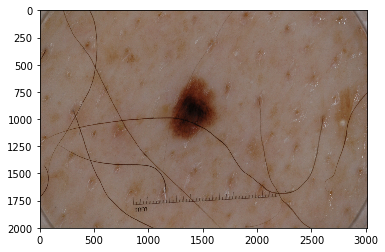

In [1139]:
filename = 'data/im/{}.jpg'.format(X[0])
image = imread(filename)
print('Name of the image {0}, class of the image {1} and type of the image object {2}'.format(X[0],y[0],type(image)))
plt.imshow(image)
plt.show()

You can found the corresponding segmentation image by adding '_Segmentation' at the ID of the image. Otherwise the ImageName.csv file contain the corresponding name.

Text(0.5, 1.0, 'Image with mask')

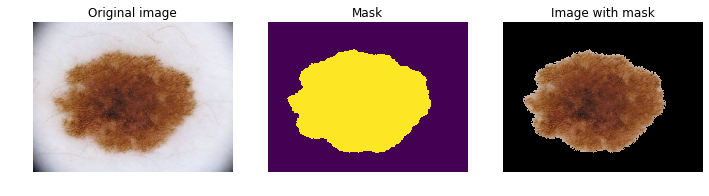

In [1140]:
name_im = X[1]
filename = 'data/im/{}.jpg'.format(name_im)
image = imread(filename)
filename_Segmentation = 'data/im/{}_segmentation.jpg'.format(name_im)
image_Segmentation = imread(filename_Segmentation) # Value 0 or 255

image_Segmentation_boolean = (image_Segmentation/255).astype(np.uint8) # To get uint8
image_Segmentation_expand = np.expand_dims(image_Segmentation_boolean, axis=2)
image_mul_mask = (image_Segmentation_expand*image) 

fig = plt.figure(figsize=(12, 12))
grid = AxesGrid(fig, 111,
                nrows_ncols = (1, 3),
                axes_pad = 0.5)
grid[0].imshow(image)
grid[0].axis('off')
grid[0].set_title("Original image")
grid[1].imshow(image_Segmentation)
grid[1].axis('off')
grid[1].set_title("Mask")
grid[2].imshow(image_mul_mask)
grid[2].axis('off')
grid[2].set_title("Image with mask")

In [1141]:
df_ImageName = pd.read_csv('data/ImageName.csv')
print(df_ImageName.head(3))
corresponding_Image = df_ImageName[df_ImageName['ImageId']==X[2]]['ImageSegId'].values[0]
print('The corresponding segmentation image of {0} is {1}.'.format(X[2],corresponding_Image))

     ImageId              ImageSegId
0  IM_000521  IM_000521_segmentation
1  IM_000737  IM_000737_segmentation
2  IM_000740  IM_000740_segmentation
The corresponding segmentation image of IM_000740 is IM_000740_segmentation.


### 2.2 Data cleaning

I have observed that there are some segmented images where the lesion part goes beyond the image border (with "white" in the border). So we should clean this kind of image.

In [1190]:
t1= time. time()
for name_im in X:
    
    filename_Segmentation = 'data/im/{}_segmentation.jpg'.format(name_im)
    image_Segmentation = imread(filename_Segmentation) # Value 0 or 255

    # Clean the segmented images with "white" in the border or it is all black
    if (np.mean(image_Segmentation[0,:]) != 0 # if there is any pixel no-null in the first row
            or np.mean(image_Segmentation[:,0]) != 0 # if there is any pixel no-null in the first column
                    or np.mean(image_Segmentation[-1,:]) != 0 # if there is any pixel no-null in the last row
                            or np.mean(image_Segmentation[:,-1]) != 0 # if there is any pixel no-null in the last column
                                    or np.mean(image_Segmentation) == 0): # if it is all black
            df_raw = df_raw[df_raw.ImageId != name_im] # clean the images satisfaiting these above conditions

X_cleaned = df_raw['ImageId'].values
y_cleaned = df_raw['Malignant'].values

t2 =  time. time()
print("Cleaned training dataset has {0} elements, while the original one has {1} elements".format(len(df_raw), len(df)))
df_raw.head()
print('Execution Time:', t2-t1)

Cleaned training dataset has 613 elements, while the original one has 700 elements
Execution Time: 21.655131816864014


In [1191]:
# Store this cleaned training dataset in a csv.file
df_raw.to_csv('train_cleaned.csv')
labels_counts_df = df_raw.groupby('Malignant').count()
labels_counts_df = labels_counts_df.rename(columns={'Malignant': 'count'})
labels_counts_df

,ImageId
Malignant,
0,388
1,225


So now, cleaned training dataset has 613 images. And the input data pour training is following:

In [1192]:
X_cleaned = df_raw['ImageId'].values
y_cleaned = df_raw['Malignant'].values

In [1193]:
X_cleaned.shape

(613,)

### 2.3 Data resizing

Here we want to resize the images to a same smaller size in order to reduce the cost of time, to do it we use resize function from scikit-image.

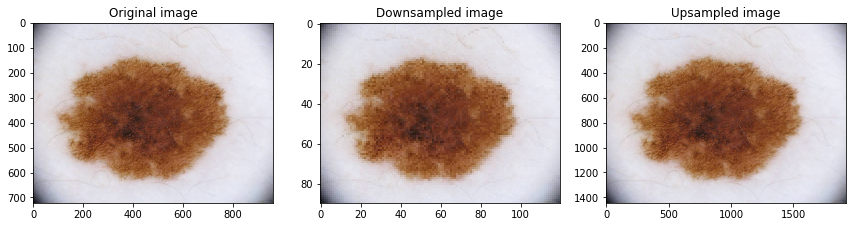

In [1146]:
# For example
image = imread(filename)
(h,w,c) = image.shape
h_div_by_8 = int(h/8)
w_div_by_8 = int(w/8)
image_downsampled = resize(image,(h_div_by_8,w_div_by_8), mode='reflect')
h_mul_by_2 = int(h*2)
w_mul_by_2 = int(w*2)
image_interpolated = resize(image,(h_mul_by_2,w_mul_by_2), mode='reflect')

fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(12, 12))

grid = axes.ravel()

grid[0].imshow(image,interpolation='nearest')
grid[0].set_title("Original image")
grid[1].imshow(image_downsampled,interpolation='nearest')
grid[1].set_title("Downsampled image")
grid[2].imshow(image_interpolated,interpolation='nearest')
grid[2].set_title("Upsampled image")
plt.tight_layout()

The feature extraction for only one image:

Number of contours: 1383
[[[ 707 1114]]

 [[ 645 1091]]

 [[ 645 1092]]

 ...

 [[1014  457]]

 [[1015  458]]

 [[1014  459]]]
{'m00': 256421.0, 'm10': 238050778.66666666, 'm01': 203029298.3333333, 'm20': 227765884189.8333, 'm11': 189634228632.91666, 'm02': 168535371647.0, 'm30': 223323803458935.72, 'm21': 182319596829841.8, 'm12': 158298387821880.34, 'm03': 146239935593573.9, 'mu20': 6769268375.191284, 'mu11': 1150124131.347107, 'mu02': 7780612942.659637, 'mu30': -693360893935.125, 'mu21': -156579229818.3418, 'mu12': 15742312301.626953, 'mu03': 475731325823.4375, 'nu20': 0.10295194443297248, 'nu11': 0.017491922184001484, 'nu02': 0.11833320632741588, 'nu30': -0.020824537733937894, 'nu21': -0.004702731446530185, 'nu12': 0.00047280771011486925, 'nu03': 0.014288208395487365}


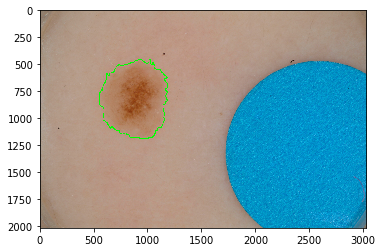

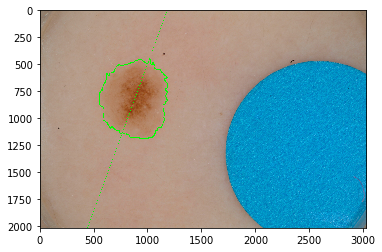

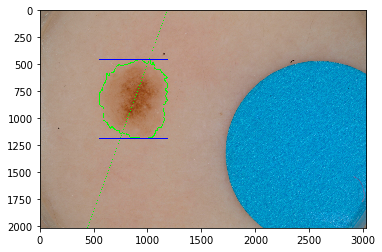

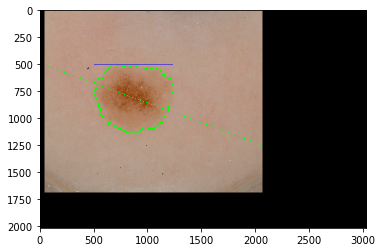

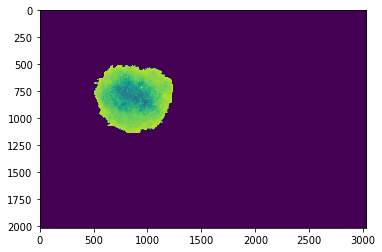

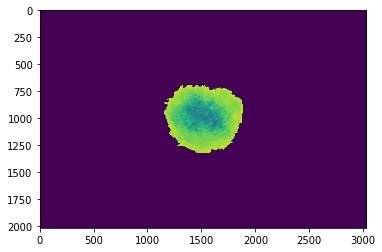

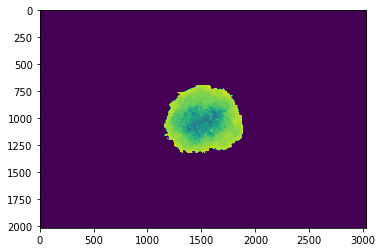

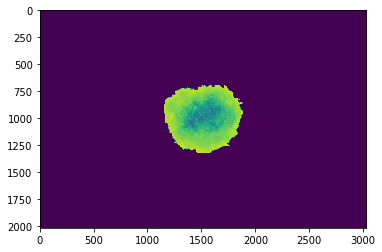

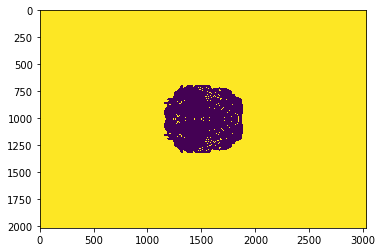

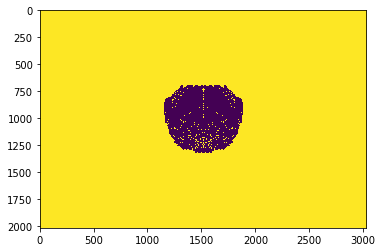

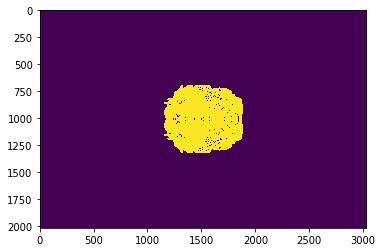

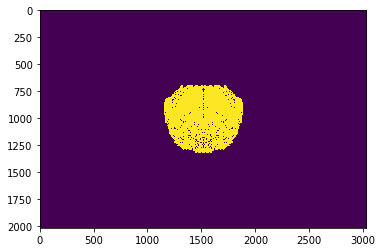

376424
356294
1.47
1.39


In [1259]:
name_im = X[6]
filename = 'data/im/{}.jpg'.format(name_im)
image = imread(filename)
filename_Segmentation = 'data/im/{}_segmentation.jpg'.format(name_im)
image_Segmentation = imread(filename_Segmentation) # Value 0 or 255

image_Segmentation_boolean = (image_Segmentation/255).astype(np.uint8) # To get uint8
image_Segmentation_expand = np.expand_dims(image_Segmentation_boolean, axis=2)
image_mul_mask = (image_Segmentation_expand*image) 

## Find contours, area, moments, centroid
gray_image_mask = cv2.cvtColor(image_mul_mask, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray_image_mask, 0, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[0]
contour = np.concatenate(contours).astype('int')
contour_area = cv2.contourArea(contour)

moments = cv2.moments(contour)
a = cv2.drawContours(image, contours, -1, (0,255,0), 3)
print ('Number of contours:', len(contours))
print(contour)
print(moments)
centroid_x = int(moments['m10'] / moments['m00'])
centroid_y = int(moments['m01'] / moments['m00'])
plt.imshow(a)
plt.show()

## Fit a axis of symmetry
rows,cols = image_mul_mask.shape[:2]
[vx,vy,x,y] = cv2.fitLine(contour, cv2.DIST_L2,0,0.01,0.01)
lefty = int((-x*vy/vx) + y)
righty = int(((cols-x)*vy/vx)+y)
b = cv2.line(image,(cols-1,righty),(0,lefty),(0,255,0),2)
plt.imshow(b)
plt.show()

# rect = cv2.fitEllipse(contour)
# (x, y) = rect[0]
# (w, h) = rect[1]
# # angle = rect[2]

## Bounding rectangle is drawn with minimum area
rect = cv2.minAreaRect(contour)
(x, y) = rect[0] # (x,y) is the center of this rectangle
(w, h) = rect[1] # weight and height
# Find max_d and min_d
max_diameter = max(w,h)
min_diameter = min(w,h)
angle = rect[2] # angle of rotation 
box = cv2.boxPoints(rect)
box = np.int0(box)
c = cv2.drawContours(image,[box],0,(0,0,255),2)
plt.imshow(c)
plt.show()

## Calculate an affine matrix of 2D rotation to make the rectangle horizontal to the image
if w < h:
    if angle < 90:
        angle += 90
    else:
        angle -= 90
            
rows, cols = gray_image_mask.shape
rot = cv2.getRotationMatrix2D((x, y), angle, 1)


warp_image = cv2.warpAffine(image, rot, (cols,rows))
warp_mask = cv2.warpAffine(gray_image_mask, rot, (cols,rows))
plt.imshow(warp_image)
plt.show()
plt.imshow(warp_mask)
plt.show()




## Translate the current warp_mask so that the centroid of lesion mask move to the centre of the 
## image (the half of the image shape)
# This will assue the estimation of asymmetry by flip. 

H = np.float32([[1,0,cols/2-x],[0,1,rows/2-y]])
tran_warp_mask = cv2.warpAffine(warp_mask,H,(cols,rows))
plt.imshow(tran_warp_mask)
plt.show()

## Study on the asymmetry by flipping image aroud its axis of symmetry (mirroring)
flipContourVertical = cv2.flip(tran_warp_mask, 1,dst=None)
flipContourHorizontal = cv2.flip(tran_warp_mask, 0,dst=None)
plt.imshow(flipContourHorizontal)
plt.show()
plt.imshow(flipContourVertical)
plt.show()
# Compare the difference between the fliped warp mask and the original warp mask
diff_horizontal = cv2.compare(tran_warp_mask, flipContourHorizontal,cv2.CV_8UC1)
diff_vertical = cv2.compare(tran_warp_mask, flipContourVertical,cv2.CV_8UC1)

plt.imshow(diff_horizontal)
plt.show()

plt.imshow(diff_vertical)
plt.show()
# Get the pixels non-zero which means the pixels where there is a difference
diff_horizontal2 = cv2.bitwise_not(diff_horizontal)
diff_vertical2 = cv2.bitwise_not(diff_vertical)

plt.imshow(diff_horizontal2)
plt.show()

plt.imshow(diff_vertical2)
plt.show()
h_asym = cv2.countNonZero(diff_horizontal2)
v_asym = cv2.countNonZero(diff_vertical2)
print(h_asym)
print(v_asym)

# Get the parameter of asymmetry by calculating the ratio of the number of different pixels before and after mirroring
# in the lesion mask to the aera of the lesion mask    
horizontal_asymmetry = round(float(h_asym) / contour_area, 2)
vertical_asymmetry = round(float(v_asym) / contour_area,2)

print(horizontal_asymmetry)
print(vertical_asymmetry)

In [1148]:
# Resize all the training images (after cleaing) to a same smaller size

def mul_mask(im):
    filename = 'data/im/{}.jpg'.format(im)
    filename_Segmentation = 'data/im/{}_segmentation.jpg'.format(im)
    image = imread(filename)
    image_Segmentation = imread(filename_Segmentation) # Value 0 or 255
    
    (h,w,c) = image.shape
    if w > c:
        h_new, w_new = 400,round(w/h*400)
    else :
        w_new, h_new = 400,round(h/w*400)
    image_resized = resize(image,(h_new, w_new), mode='reflect')
    image_resized = (255 * image).astype(np.uint8)
    
    image_Segmentation_resized = resize(image_Segmentation,(h_new, w_new), mode='reflect')
    image_Segmentation_boolean = (image_Segmentation/255).astype(np.uint8) # To get uint8
    image_Segmentation_expand = np.expand_dims(image_Segmentation_boolean, axis=2)
    image_mul_mask = (image_Segmentation_expand*image) 
    skin_mul_mask = (1-image_Segmentation_expand)*image
    
    return image_mul_mask, skin_mul_mask, image    



## 3. Feature Extraction

In [679]:
def feature_extraction2(features, im):
    """
    This method extracts Asymmetry, Border, and Diamter features along with
    lesion area, centroid, and perimeter. Performs affine transformation
    Input:
    :param features: a pd.DataFrame to be filled by the output features
    :param ime: 3-d numpy array of an RGB image
    During the function:
    :param gray_image_mask: binary image of the lesion mask image
    :param contour: list of contour points of the lesion
    Output:
    :return: a list of all the features along with min, max, average, std,contour_area,
    contour_centroid,perimeter,max and min diameter,horizontal_asymmetry,vertical_asymmetry
    of the lesion.
    """
    
    ## Read the files containing the image and the segmentation mask
    image_mul_mask, skin_mul_mask, image = mul_mask(im)
    
    ## Calculate min, max, average and std of the normalized Hue and Value matrices
    im_hsv = cv2.cvtColor(image_mul_mask, cv2.COLOR_RGB2HSV)
    int_not0 = im_hsv[np.nonzero(im_hsv[:,:,2])]     
    skin_hsv = cv2.cvtColor(skin_mul_mask, cv2.COLOR_RGB2HSV).astype(np.double)
    skin_int_not0 = skin_hsv[np.nonzero(skin_hsv[:,:,2])]     
    
    # Normalization
    mean_int_skin = np.mean(skin_int_not0[:,2])
    unique, counts = np.unique(skin_int_not0[:,0], return_counts=True)
    n_hue_skin = unique[np.argmax(counts)]
    int_n_not0 = int_not0 - [mean_int_skin, 0, n_hue_skin]
    min_hue, max_hue, mean_hue, std_hue = np.min(int_n_not0[:,0]), np.max(int_n_not0[:,0]), np.mean(int_n_not0[:,0]), np.std(int_n_not0[:,0])
    min_int, max_int, mean_int, std_int = np.min(int_n_not0[:,2]), np.max(int_n_not0[:,2]), np.mean(int_n_not0[:,2]), np.std(int_n_not0[:,2])
    
    ## Find contours
    
    gray_image_mask = cv2.cvtColor(image_mul_mask, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(gray_image_mask, 0, 255, 0)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contour = np.concatenate(contours).astype('int')
    n_contours = len(contours)
    
#     contours = find_contours(image_mul_mask[:,:,2],0)
#     contour = np.concatenate(contours).astype('int')
    
    moments = cv2.moments(contour)
  
    
    ## Find area, centroid and perimeter
#     gray_image_mask = cv2.cvtColor(image_mul_mask, cv2.COLOR_BGR2GRAY)
    contour_area = cv2.contourArea(contour)
#     contour_area = cv2.countNonZero(gray_image_mask)
#     contour_area_int = int(contour_area)
    
#     contour_centroid = [int(moments['m10'] / moments['m00']),
#                         int(moments['m01'] / moments['m00'])]
    
    centroid_x = int(moments['m10'] / moments['m00'])
    centroid_y = int(moments['m01'] / moments['m00'])
    
    contour_perimeter = cv2.arcLength(contour, True)
    perimeter = int(contour_perimeter)
    
    
    ## Find max_d and min_d
    # Bounding rectangle is drawn with minimum area
    rect = cv2.minAreaRect(contour)
    (x, y) = rect[0] # (x,y) is the center of this rectangle
    (w, h) = rect[1] # weight and height
    max_diameter = max(w,h)
    min_diameter = min(w,h)
    angle = rect[2] # angle of rotation 

    
    ## Calculate an affine matrix of 2D rotation to make the rectangle horizontal to the image
    if w < h:
        if angle < 90:
            angle += 90
        else:
            angle -= 90

    rows, cols = gray_image_mask.shape
    rot = cv2.getRotationMatrix2D((x, y), angle, 1)


    warp_image = cv2.warpAffine(image, rot, (cols,rows))
    warp_mask = cv2.warpAffine(gray_image_mask, rot, (cols,rows))
    
    
    ## Translate the current warp_mask so that the centroid of lesion mask move to the centre of the 
    ## image (the half of the image shape)
    # This will assue the estimation of asymmetry by flip. 
    H = np.float32([[1,0,cols/2-x],[0,1,rows/2-y]])
    tran_warp_mask = cv2.warpAffine(warp_mask,H,(cols,rows))
    
    
    ## Study on the horizontal/vertical asymmetry by usng openCV flip() method(mirroring)
    flipContourVertical = cv2.flip(tran_warp_mask, 1,dst=None)
    flipContourHorizontal = cv2.flip(tran_warp_mask, 0,dst=None)
    
    # Compare the difference between the fliped warp mask and the original warp mask
    diff_horizontal = cv2.compare(tran_warp_mask, flipContourHorizontal,cv2.CV_8UC1)
    diff_vertical = cv2.compare(tran_warp_mask, flipContourVertical,cv2.CV_8UC1)

    # Get the pixels non-zero which means the pixels where there is a difference
    diff_horizontal2 = cv2.bitwise_not(diff_horizontal)
    diff_vertical2 = cv2.bitwise_not(diff_vertical)
    h_asym = cv2.countNonZero(diff_horizontal2)
    v_asym = cv2.countNonZero(diff_vertical2)

    # Get the parameter of asymmetry by calculating the ratio of the number of different pixels before and after mirroring
    # in the lesion mask to the aera of the lesion mask    
    horizontal_asymmetry = round(float(h_asym) / contour_area, 2)
    vertical_asymmetry = round(float(v_asym) / contour_area,2)

    features.loc[im] = [min_hue, max_hue, mean_hue, std_hue, min_int, max_int, 
                        mean_int, std_int,n_contours,contour_area,centroid_x,centroid_y,perimeter,max_diameter,min_diameter,
                        horizontal_asymmetry,vertical_asymmetry]

I modified a little the function above:

In [1149]:
def feature_extraction(features, im):
    """
    This method extracts Asymmetry, Border, and Diamter features along with
    lesion area, centroid, and perimeter. Performs affine transformation
    Input:
    :param features: a pd.DataFrame to be filled by the output features
    :param ime: 3-d numpy array of an RGB image
    During the function:
    :param gray_image_mask: binary image of the lesion mask image
    :param contour: list of contour points of the lesion
    Output:
    :return: a list of all the features along with min, max, average, std,contour_area,
    contour_centroid,perimeter,max and min diameter,horizontal_asymmetry,vertical_asymmetry
    of the lesion.
    """
    
    ## Read the files containing the image and the segmentation mask
    image_mul_mask, skin_mul_mask, image = mul_mask(im)
    
    ## Calculate min, max, average and std of the normalized Hue and Value matrices
    im_hsv = cv2.cvtColor(image_mul_mask, cv2.COLOR_RGB2HSV)
    int_not0 = im_hsv[np.nonzero(im_hsv[:,:,2])]     
    skin_hsv = cv2.cvtColor(skin_mul_mask, cv2.COLOR_RGB2HSV).astype(np.double)
    skin_int_not0 = skin_hsv[np.nonzero(skin_hsv[:,:,2])]     
    
    # Normalization
    mean_int_skin = np.mean(skin_int_not0[:,2])
    unique, counts = np.unique(skin_int_not0[:,0], return_counts=True)
    n_hue_skin = unique[np.argmax(counts)]
    int_n_not0 = int_not0 - [mean_int_skin, 0, n_hue_skin]
    min_hue, max_hue, mean_hue, std_hue = np.min(int_n_not0[:,0]), np.max(int_n_not0[:,0]), np.mean(int_n_not0[:,0]), np.std(int_n_not0[:,0])
    min_int, max_int, mean_int, std_int = np.min(int_n_not0[:,2]), np.max(int_n_not0[:,2]), np.mean(int_n_not0[:,2]), np.std(int_n_not0[:,2])
    
    ## Find contours
    contours = find_contours(image_mul_mask[:,:,2],0)
    contour = np.concatenate(contours).astype('int')
    
    moments = cv2.moments(contour)
    
    ## Find area, centroid and perimeter
    gray_image_mask = cv2.cvtColor(image_mul_mask, cv2.COLOR_BGR2GRAY)
    contour_area = cv2.countNonZero(gray_image_mask)
    contour_area_int = int(contour_area)
    
    contour_centroid = [int(moments['m10'] / moments['m00']),
                        int(moments['m01'] / moments['m00'])]
    
#     centroid_x = int(moments['m10'] / moments['m00'])
#     centroid_y = int(moments['m01'] / moments['m00'])
    
    contour_perimeter = cv2.arcLength(contour, True)
    perimeter = int(contour_perimeter)
        
    B = round((contour_perimeter ** 2) / (4 * np.pi * contour_area), 2)
        
    ## Get max and min diameter
    rect = cv2.fitEllipse(contour)
    (x, y) = rect[0]
    (w, h) = rect[1]
    angle = rect[2]

    if w < h:
        if angle < 90:
            angle -= 90
        else:
            angle += 90
            
    rows, cols = gray_image_mask.shape
    rot = cv2.getRotationMatrix2D((x, y), angle, 1)
    cos = np.abs(rot[0, 0])
    sin = np.abs(rot[0, 1])
    nW = int((rows * sin) + (cols * cos))
    nH = int((rows * cos) + (cols * sin))

    rot[0, 2] += (nW / 2) - cols / 2
    rot[1, 2] += (nH / 2) - rows / 2

    warp_mask = cv2.warpAffine(gray_image_mask, rot, (nH, nW))
    #gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    warp_img = cv2.warpAffine(image, rot, (nH, nW))
    #warp_img_segmented = cv2.bitwise_and(warp_img, warp_img,mask=warp_mask)

#     cnts, hierarchy = cv2.findContours(warp_mask, cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
#     areas = [cv2.contourArea(c) for c in cnts]
#     contour = cnts[np.argmax(areas)]
#     xx, yy, nW, nH = cv2.boundingRect(contour)
#     warp_mask = warp_mask[yy:yy + nH, xx:xx + nW]
        
    ## Get horizontal/vertical asymmetry by usng openCV flip() method
    flipContourHorizontal = cv2.flip(warp_mask, 1,dst=None)
    flipContourVertical = cv2.flip(warp_mask, 0,dst=None)

    diff_horizontal = cv2.compare(warp_mask, flipContourHorizontal,cv2.CV_8UC1)
    diff_vertical = cv2.compare(warp_mask, flipContourVertical,cv2.CV_8UC1)

    diff_horizontal = cv2.bitwise_not(diff_horizontal)
    diff_vertical = cv2.bitwise_not(diff_vertical)

    h_asym = cv2.countNonZero(diff_horizontal)
    v_asym = cv2.countNonZero(diff_vertical)
        
    horizontal_asymmetry = round(float(h_asym) / contour_area, 2)
    vertical_asymmetry = round(float(v_asym) / contour_area,2)
        
    features.loc[im] = [min_hue, max_hue, mean_hue, std_hue, min_int, max_int, 
                        mean_int, std_int,contour_area_int,perimeter,max([nW, nH]),min([nW, nH]),
                        horizontal_asymmetry,vertical_asymmetry,B]
    

Feature extraction with function feature_extraction2(features, im), retures features.csv

In [684]:

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

columns = ['min_hue', 'max_hue', 'mean_hue', 'std_hue', 'min_value', 'max_value','mean_value', 'std_value','n_contours', 'contour_area','centroid_x','centroid_y', 'perimeter',
        'max_diameter','min_diameter','horizontal_asymmetry','vertical_asymmetry']

features = pd.DataFrame(columns = columns, index = X_cleaned)

t1 = time.time()

for im in X_cleaned:
    feature_extraction2(features, im)

t2 = time.time()

print("Cost of time:",t2-t1)

Cost of time: 1471.7481830120087


In [1194]:
features.head()

,min_hue,max_hue,mean_hue,std_hue,min_value,max_value,mean_value,std_value,n_contours,contour_area,centroid_x,centroid_y,perimeter,max_diameter,min_diameter,horizontal_asymmetry,vertical_asymmetry
IM_000521,-137.438,41.5618,-129.344,6.24201,-3,140,71.2468,32.2686,222,193556,1416,928,18022,528.372,479.231,1.08,1.09
IM_000737,-223.636,-44.6355,-212.829,4.59553,-89,96,19.2911,29.3046,1306,201585,481,336,213378,650.754,518.738,1.4,1.4
IM_000740,-178.644,0.355574,-159.648,39.1051,48,240,160.974,17.5129,4417,4.5589e+06,1655,1023,2653251,2258.53,1960.92,0.8,0.78
IM_000411,-172.206,6.79401,-148.908,53.2301,38,221,145.033,24.8278,1309,208886,622,384,203417,823.034,386.147,1.35,1.16
IM_000678,-134.115,44.8846,16.9273,41.389,82,218,171.819,11.637,1888,124202,991,342,566551,974.794,937.534,6.12,6.26


Feature extraction with function feature_extraction(features, im), retures features2.csv

In [1150]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

columns2 = ['min_hue', 'max_hue', 'mean_hue', 'std_hue', 'min_int', 'max_int','mean_int', 'std_int', 'area', 'perimeter',
        'max_diameter','min_diameter','horizontal_asymmetry','vertical_asymmetry','B']

features2 = pd.DataFrame(columns = columns2, index = X_cleaned)

t1 = time.time()

for im in X_cleaned:
    feature_extraction(features2, im)

t2 = time.time()

print("Cost of time:",t2-t1)

Cost of time: 1556.1781640052795


Now I want to store the features of training dataset in a csv.file.

In [1281]:
# Store the features of training dataset in a csv.file
features.to_csv('train_features.csv')

#### I choose the first funtion feature_extraction2(features, im) to extract the features because I think that the implementations by code are more logic, that I will explain in the report.

## 4. Classification

### 4.1 Pre-processing

Now, we should shuffle the data randomly

In [1267]:
# Shuffle data randomly
X_features = features.iloc[:,0:20].values # Features
N,M=X_features.shape
indeces=np.arange(N)
np.random.shuffle(indeces)
Xp=X_features[indeces]
Yp=y[indeces]
#X_cleaned=[''] * N
for i in range(0,N):
    X_cleaned[i]=X_cleaned[indeces[i]]   

In [1198]:
X_features.shape

(613, 17)

In [1199]:
Xp.shape

(613, 17)

### Scaling the features 

It might be very important to scale the data such that each feature has, for instance, average equal to 0 and unit variance.

In [1268]:
# Scale data (each feature will have average equal to 0 and unit variance)
Xmean = np.mean(Xp,axis=0) # Compute average

# Compute distances from the average configuration (features)
dist_average=np.zeros((N,M))
average=np.reshape(Xmean,(M,1))
for i in range(N):
    landmark=np.reshape(Xp[i],(M,1))
    dist_average[i]=paired_distances(landmark, average)     

scaler = StandardScaler()
scaler.fit(dist_average)
dist_average_scale=scaler.transform(dist_average)

In [1205]:
dist_average_scale.shape

(613, 17)

In [1269]:
dist_average_scale

array([[-6.95910013e-01, -7.73389632e-01, -3.65268853e-01, ...,
         2.06015168e-01, -2.97093493e-01, -2.77974084e-01],
       [-1.05820710e+00, -6.21326133e-01, -5.25074566e-01, ...,
         4.37056535e+00,  8.70011183e-03,  1.62111392e-03],
       [-2.74205190e-01, -2.31278853e-02, -6.24433136e-01, ...,
         3.68471999e-01,  1.27047903e+01,  1.21805762e+01],
       ...,
       [ 3.98690117e-01,  4.48958968e-01, -8.67967456e-02, ...,
         2.90293988e-02,  1.08260820e-01,  6.04832608e-02],
       [-1.37700067e+00, -5.35761519e-01, -9.01274667e-01, ...,
        -1.91135934e-01, -1.81210026e-01, -1.73116883e-01],
       [-9.82220537e-01,  1.62679590e+00, -2.73626884e-01, ...,
        -8.51960859e-01, -1.76198347e-01, -1.82323095e-01]])

In [1232]:
print(np.mean(dist_average_scale))
print(np.std(dist_average_scale))

8.659334751130672e-16
1.0


In [1208]:
# Code from scikit-learn
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

### 4.2 LDA & QDA

As we learned from previous TPs, we use the technique Cross-validation to reduce the training test error.

In [1270]:
# We use the technique Cross-validation to reduce the training test error.
# Fitting LDA
print("Fitting LDA")
t0 = time.time()
lda = LinearDiscriminantAnalysis()
lda_score = cross_val_score(lda,X=dist_average_scale, y=np.ravel(Yp),cv=5)
print("done in %0.3fs" % (time.time() - t0))
print(" Average and std CV score : {0} +- {1}".format(lda_score.mean(), lda_score.std() ))

# Fitting QDA
print("Fitting QDA")
t0 = time.time()
qda = QuadraticDiscriminantAnalysis()
qda_score = cross_val_score(qda,X=dist_average_scale, y=np.ravel(Yp),cv=5)
print("done in %0.3fs" % (time.time() - t0))
print(" Average and std CV score : {0} +- {1}".format(qda_score.mean(), qda_score.std() ))


Fitting LDA
done in 0.141s
 Average and std CV score : 0.5806356245380635 +- 0.021938150752981563
Fitting QDA
done in 0.016s
 Average and std CV score : 0.5479809178257071 +- 0.039009278653188345


### 4.3 KNN

I use the GridSearchCV method to find the best hyper-parameter for KNN, which is the number of neighbours. Let's see how to estimate it by using one cross-validation:

Fitting KNN on original data
Best training Score: 0.5634146341463414
Best training params: {'n_neighbors': 6}
Normalized confusion matrix
[[0.78740157 0.21259843]
 [0.89473684 0.10526316]]


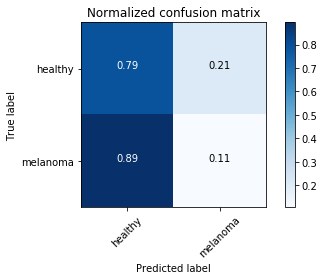

In [1271]:
# Fitting KNN on original data

# Looking for the best hyperparameters
X_train, X_test, y_train, y_test = train_test_split(dist_average_scale, Yp, test_size=0.33, random_state=1)
KNN = KNeighborsClassifier()
p_grid_KNN = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10]}
grid_KNN = GridSearchCV(estimator=KNN, param_grid=p_grid_KNN, scoring="accuracy", cv=5)
grid_KNN.fit(X_train, y_train)
print('Fitting KNN on original data')
print("Best training Score: {}".format(grid_KNN.best_score_))
print("Best training params: {}".format(grid_KNN.best_params_))
y_pred = grid_KNN.predict(X_test)
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

# Plot normalized confusion matrix
plt.figure()
class_names = ["healthy","melanoma"]
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

Number of healthy and melanoma skin lesion is respectively: 388 and 233. There is a relative imbalancing issue in this dataset. We found that the accuracy is higher in the majority class (healthy); but lower in the minority class (melanoma).

The core idea of random oversampling is to create a balanced data set by sampling and then train a perfect classifier.

In [1272]:
X_train, X_test, y_train, y_test = train_test_split(dist_average_scale, Yp, test_size=0.33, random_state=2)
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
print(sorted(Counter(y_resampled).items()))

[(0, 239), (1, 239)]


In [1236]:
X_resampled.shape

(478, 17)

Let's retest KNN on this new data-set

Fitting KNN on oversampled data
Best training Score: 0.6338912133891214
Best training params: {'n_neighbors': 1}
Normalized confusion matrix
[[0.624      0.376     ]
 [0.62820513 0.37179487]]


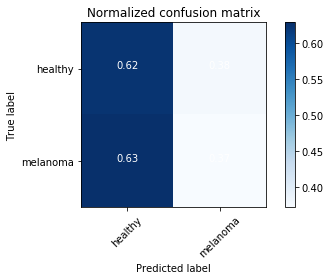

In [1273]:
# Fitting KNN on oversampled data

# Looking for the best hyperparameters
grid_KNN = GridSearchCV(estimator=KNN, param_grid=p_grid_KNN, scoring="accuracy", cv=5)
grid_KNN.fit(X_resampled, y_resampled)
print('Fitting KNN on oversampled data')
print("Best training Score: {}".format(grid_KNN.best_score_))
print("Best training params: {}".format(grid_KNN.best_params_))
y_pred = grid_KNN.predict(X_test)
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

It seems to be better. Let's use more advanced techiques such as SVM

### 4.4 SVM

I use the GridSearchCV method to find the best hyper-parameter for SVM, which are kernel, C and gamma. Let's see how to estimate it by using one cross-validation:

In [1238]:
# Fitting SVM on original data
grid_svc = [{'kernel': ['rbf'], 'gamma': [1e-1, 1e-2,1e-3, 1e-4],
                     'C': [1e-3,1e-2,1e-1,2,3,4,5,6,7,8,9,10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1e-3,1e-2,1e-1,2,3,4,5,6,7,8,9,10, 100, 1000]}]

# Looking for the best hyperparameters
svm = GridSearchCV(SVC(), grid_svc, scoring="accuracy",cv=5)
svm.fit(X_train, y_train)
print('Fitting Linear SVM on original data')
print("Best Score: {}".format(svm.best_score_))
print("Best params: {}".format(svm.best_params_))

Fitting Linear SVM on original data
Best Score: 0.5829268292682926
Best params: {'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}


In [1239]:
# Fitting SVM on over-sampled data

# Looking for the best hyperparameters
svm = GridSearchCV(SVC(), grid_svc, scoring="accuracy",cv=5)
svm.fit(X_resampled, y_resampled)
print('Fitting Linear SVM over-sampled data')
print("Best Score: {}".format(svm.best_score_))
print("Best params: {}".format(svm.best_params_))


Fitting Linear SVM over-sampled data
Best Score: 0.6317991631799164
Best params: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}


### 4.5 Random Forest

I use the GridSearchCV method to find the best hyper-parameter for Random Forest, which are max_depth and n_estimators. Let's see how to estimate it by using one cross-validation:

In [1240]:
# Fitting Random Forest on original data
grid_rdf = {'max_depth': [5, 10, 15, 20], 'n_estimators': [10, 20 ,30, 40, 50, 60]}

# Looking for the best hyperparameters            
rdf = GridSearchCV(RandomForestClassifier(), grid_rdf, scoring ="accuracy",cv=5 )
rdf.fit(X_train, y_train)
print('Fitting Random Forest on original data')
print("Best Score: {}".format(rdf.best_score_))
print("Best params: {}".format(rdf.best_params_))

Fitting Random Forest on original data
Best Score: 0.573170731707317
Best params: {'max_depth': 15, 'n_estimators': 10}


In [1241]:
# Fitting Random Forest on over-sampled data

# Looking for the best hyperparameters            
rdf = GridSearchCV(RandomForestClassifier(), grid_rdf, scoring ="accuracy",cv=5 )
rdf.fit(X_resampled, y_resampled)
print('Fitting Random Forest on over-sampled data')
print("Best Score: {}".format(rdf.best_score_))
print("Best params: {}".format(rdf.best_params_))

Fitting Random Forest on over-sampled data
Best Score: 0.6757322175732218
Best params: {'max_depth': 20, 'n_estimators': 30}


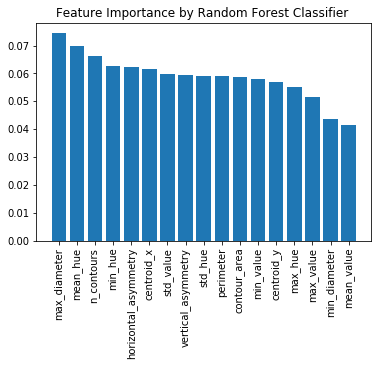

In [1242]:
# Create random forest classifer
rdf = RandomForestClassifier(max_depth=20, n_estimators= 30)

# Calculate feature importances
importances = rdf.fit(X_resampled, y_resampled).feature_importances_

# Visualize Feature Importance
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [columns[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance by Random Forest Classifier ")

# Add bars
plt.bar(range(X_resampled.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_resampled.shape[1]), names, rotation=90)

# Show plot
plt.show()

### 4.6 Bagging

I use the GridSearchCV method to find the best hyper-parameter for Bagging based on decision tree, which are min_samples_leaf and n_estimators. Let's see how to estimate it by using one cross-validation:

In [856]:
# Bagging based on decision tree
print("Bagging based on decision tree on original data: ")
grid_tree = {'min_samples_leaf': [2,3,4,5,6,10],'min_samples_split': [2,3,4,5,6]} 
Tree = DecisionTreeClassifier(criterion="gini",random_state=0)

# Looking for the best hyperparameters for the decision tree
tree = GridSearchCV(estimator=Tree, param_grid=grid_tree, scoring="precision", cv=5)
tree.fit(X_train, y_train)
Best_tree = DecisionTreeClassifier(criterion="gini", min_samples_leaf=tree.best_params_['min_samples_leaf'],  random_state=0)

p_grid_bagging = {'n_estimators': [500,1000,1500,2000]}      
Bagging_tree=BaggingClassifier(base_estimator=Best_tree, random_state=0, max_samples=0.5)

# Looking for the best hyperparameters for the bagging based on decision tree
grid_bag = GridSearchCV(estimator=Bagging_tree, param_grid=p_grid_bagging, scoring="accuracy", cv=5)
grid_bag.fit(X_train, y_train)
print("Best Score: {}".format(grid_bag.best_score_))
print("Best params: {}".format(grid_bag.best_params_))

Bagging based on decision tree on original data: 
Best Score: 0.5707317073170731
Best params: {'n_estimators': 2000}


In [721]:
# Bagging based on decision tree
print("Bagging based on decision tree on oversampled data: ")

# Looking for the best hyperparameters for the decision tree
tree = GridSearchCV(estimator=Tree, param_grid=grid_tree, scoring="precision", cv=5)
tree.fit(X_resampled, y_resampled)
Best_tree = DecisionTreeClassifier(criterion="gini", min_samples_leaf=tree.best_params_['min_samples_leaf'],  random_state=0)
print("Best params: {}".format(tree.best_params_))

p_grid_bagging = {'n_estimators': [500,1000,1500,2000]}      
Bagging_tree=BaggingClassifier(base_estimator=Best_tree,random_state=0,max_samples=0.5)

# Looking for the best hyperparameters for the bagging based on decision tree
grid_bag = GridSearchCV(estimator=Bagging_tree, param_grid=p_grid_bagging, scoring="accuracy", cv=5)
grid_bag.fit(X_resampled, y_resampled)
print("Best Score: {}".format(grid_bag.best_score_))
print("Best params: {}".format(grid_bag.best_params_))

Bagging based on decision tree on oversampled data: 
Best params: {'min_samples_leaf': 2, 'min_samples_split': 2}
Best Score: 0.7380952380952381
Best params: {'n_estimators': 500}


In [1278]:
# Adaboost based on decision tree
print("Bagging based on decision tree on oversampled data: ")

# Looking for the best hyperparameters for the decision tree
tree = GridSearchCV(estimator=Tree, param_grid=grid_tree, scoring="precision", cv=5)
tree.fit(X_resampled, y_resampled)
Best_tree = DecisionTreeClassifier(criterion="gini", min_samples_leaf=tree.best_params_['min_samples_leaf'],  random_state=0)
print("Best params: {}".format(tree.best_params_))

p_grid_bagging = {'n_estimators': [500,1000,1500,2000]}      
Adaboost=AdaBoostClassifier(base_estimator=Best_tree)

# Looking for the best hyperparameters for the bagging based on decision tree
grid_bag = GridSearchCV(estimator=Adaboost, param_grid=p_grid_bagging, scoring="accuracy", cv=5)
grid_bag.fit(X_resampled, y_resampled)
print("Best Score: {}".format(grid_bag.best_score_))
print("Best params: {}".format(grid_bag.best_params_))

Bagging based on decision tree on oversampled data: 
Best params: {'min_samples_leaf': 2, 'min_samples_split': 6}
Best Score: 0.6506276150627615
Best params: {'n_estimators': 500}


## Test and submission

The test.csv is the file containing the ID of the test set.We read it. The Malignant column is empty. We have to fill it with an integerequal to 0 or 1 : the answer of the binary classifier chosed on our own.

In [1284]:
test_df = pd.read_csv('data/test.csv')
X_test = test_df['ImageId'].values
test_df_raw = test_df.copy()  # Save original data set, just in case.

In [924]:
test_df.head()

,ImageId,Malignant
0,IM_000788,NaN
1,IM_000640,NaN
2,IM_000889,NaN
3,IM_000550,NaN
4,IM_000886,NaN


Then, let's extract the features from the test dataset:

In [797]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

columns = ['min_hue', 'max_hue', 'mean_hue', 'std_hue', 'min_value', 'max_value','mean_value', 'std_value','n_contours', 'contour_area','centroid_x','centroid_y', 'perimeter',
        'max_diameter','min_diameter','horizontal_asymmetry','vertical_asymmetry']

test_features = pd.DataFrame(columns = columns, index = X_test)

t1 = time.time()

for im in X_test:
    feature_extraction2(test_features, im)

t2 = time.time()

print("Cost of time:",t2-t1)

Cost of time: 787.3638288974762


In [1286]:
# Store the features of test dataset in a csv.file
test_features.to_csv('test_features.csv')
test_features.head()

,min_hue,max_hue,mean_hue,std_hue,min_value,max_value,mean_value,std_value,n_contours,contour_area,centroid_x,centroid_y,perimeter,max_diameter,min_diameter,horizontal_asymmetry,vertical_asymmetry
IM_000788,-158.726,18.2745,-150,2.3058,32,160,113.013,18.5291,303,677992,2277,1660,41807,1000,904,1.07,1.07
IM_000640,-221.111,-42.1107,-212.974,13.4915,-10,244,156.4,40.0291,777,1.18572e+07,3894,2029,481793,4690.18,3360.86,1.12,1.11
IM_000889,-173,-158,-164.153,1.40429,103,193,157.951,7.15785,2677,121910,514,338,388923,847.884,653.903,3.27,3.46
IM_000550,-127.57,51.43,-119.478,1.9461,26,137,110.375,12.0465,177,237318,2131,1384,14939,603,510,1.02,1
IM_000886,-167.948,11.0516,-159.371,16.0062,57,244,109.558,14.5311,3284,1.11849e+06,1078,1139,660788,1773,965.133,1.27,1.25


In [1287]:
X_test_features = test_features.iloc[:,0:20].values # test Features
n,m=X_test_features.shape

In [1288]:
X_test_features.shape

(300, 17)

Next, we center and scale the data :

In [1113]:
test_features_cope = test_features.copy() 

In [1114]:
m,sigma = [],[]

for i in range(test_features_cope.shape[1]):
    m.append(np.mean(test_features_cope.iloc[:,i]))
    sigma.append(np.std(test_features_cope.iloc[:,i]))
    test_features_cope.iloc[:,i] = (test_features_cope.iloc[:,i] - m[i])/sigma[i]

In [1115]:
# Store the features of test dataset in a csv.file
test_features_cope.to_csv('data/test_features_scaled.csv') #features.to_csv('train_features.csv')
test_features_cope.head()

,min_hue,max_hue,mean_hue,std_hue,min_value,max_value,mean_value,std_value,n_contours,contour_area,centroid_x,centroid_y,perimeter,max_diameter,min_diameter,horizontal_asymmetry,vertical_asymmetry
IM_000788,0.886712,0.893231,0.430039,-0.712663,-0.0260727,-0.455146,-0.124847,-0.295998,-0.76677,-0.178254,1.08278,1.38769,-0.465993,-0.0590736,0.125918,-0.359295,-0.351203
IM_000640,-1.14305,0.109173,-1.19149,-0.268385,-0.608548,0.865484,0.552479,1.36473,-0.4863,4.42853,2.88413,2.04335,0.0323746,3.96347,3.66279,-0.279523,-0.288413
IM_000889,0.422286,-1.39556,0.0655949,-0.748469,0.958588,0.0636732,0.576689,-1.17435,0.637947,-0.407407,-0.881211,-0.961316,-0.0728182,-0.22489,-0.234119,3.15069,3.40047
IM_000550,1.90039,1.32373,1.21593,-0.726949,-0.109284,-0.816746,-0.166032,-0.796734,-0.841326,-0.35985,0.920135,0.897278,-0.496426,-0.49183,-0.441281,-0.439068,-0.461085
IM_000886,0.586638,0.799447,0.188731,-0.168506,0.320639,0.865484,-0.178786,-0.604817,0.997115,0.00326822,-0.252913,0.461948,0.23512,0.783549,0.213925,-0.0402053,-0.0686499


In [1245]:
X_test_features = test_features_cope.values
X_test_features.shape

(300, 17)

In [1246]:
X_test_features

array([[0.8867123623833604, 0.8932306550569732, 0.43003914658099673, ...,
        0.1259180107595606, -0.35929529393658355, -0.3512030097414388],
       [-1.1430483193314471, 0.10917336799935318, -1.1914938763406793,
        ..., 3.6627914064566394, -0.2795228041638074,
        -0.28841343708206324],
       [0.4222857736168209, -1.3955609348448843, 0.06559486657541137,
        ..., -0.23411890547208103, 3.150694256065564, 3.400473956656246],
       ...,
       [0.6014291207561059, 0.7793813759865347, 0.21636420889918728, ...,
        -0.08858104050951486, 0.10338514674551774, 0.1354161783687209],
       [-0.5707272035602221, -1.8957212458650587, -0.8298421047506561,
        ..., -0.14069504119532117, -0.7741122407550192,
        -0.7593352320273794],
       [-0.8786310909056209, -1.9147237370888759, -0.9876993059567802,
        ..., -0.7262513392435177, -0.4231132857548045,
        -0.4139925824008143]], dtype=object)

Now we make predictions on the test dataset :

In [237]:


# SVM = SVC(C= 100, gamma = 0.1, kernel = 'rbf')
# SVM.fit(X_resampled, y_resampled)


Best_tree = DecisionTreeClassifier(criterion="gini", min_samples_leaf=2,min_samples_split= 2,  random_state=0)
Bagging_tree=BaggingClassifier(base_estimator=Best_tree, random_state=0, max_samples=0.5,n_estimators= 500)
Bagging_tree.fit(X_resampled, y_resampled)

# rdf = RandomForestClassifier(max_depth=20, n_estimators= 30)
# rdf.fit(X_resampled, y_resampled)

for Id in test_df['ImageId']:
    prediction = Bagging_tree.predict(X_test_features) # the result of the SVM classifier
    test_df['Malignant'] = prediction

test_df['Malignant'] = test_df['Malignant'].astype(int) # This line is mandatory to be sure to have integer
print(test_df.head(5))
test_df.to_csv('data/exemple_test.csv', index=None, sep=',', mode='w') # Save the data in the exemple_test.csv file


# SVM = SVC(C= 1000, gamma = 0.1, kernel = 'rbf')
# prediction = SVM.predict(X_test_features)

# test_df['Malignant'] = prediction

# test_df['Malignant'] = test_df['Malignant'].astype(int) # This line is mandatory to be sure to have integer
# print(test_df.head(3))
# test_df.to_csv('data/example_test.csv', index=None, sep=',', mode='w') # Save the data in the exemple_test.csv file

     ImageId  Malignant
0  IM_000788          1
1  IM_000640          1
2  IM_000889          0
3  IM_000550          1
4  IM_000886          0


In [238]:
labels_counts_test_df = test_df.groupby('Malignant').count()
labels_counts_test_df = labels_counts_test_df.rename(columns={'Malignant': 'count'})
labels_counts_test_df

,ImageId
Malignant,
0,155
1,145


In [1118]:


SVM = SVC(C= 1000, gamma = 0.1, kernel = 'rbf') # {'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}
SVM.fit(X_resampled, y_resampled)


# GB=GradientBoostingClassifier(n_estimators=500) # Best params: {'n_estimators': 500}
# GB.fit(X_resampled, y_resampled)

# Best_tree = DecisionTreeClassifier(criterion="gini", min_samples_leaf=2,min_samples_split= 2)
# # Best params: {'min_samples_leaf': 2, 'min_samples_split': 2}
# # Best params: {'n_estimators': 500}
# Bagging_tree=BaggingClassifier(base_estimator=Best_tree,max_samples=0.5, n_estimators= 500)
# Bagging_tree.fit(X_resampled, y_resampled)

# rdf = RandomForestClassifier(max_depth=20, n_estimators= 50) #Best params: {'max_depth': 20, 'n_estimators': 50}
# rdf.fit(X_resampled, y_resampled)

# Best_tree = DecisionTreeClassifier(criterion="gini", min_samples_leaf=2,min_samples_split= 2)
# adaboost=AdaBoostClassifier(base_estimator=Best_tree,n_estimators= 500)
# adaboost.fit(X_resampled, y_resampled)

for Id in test_df['ImageId']:
    prediction = SVM.predict(X_test_features) 
    test_df['Malignant'] = prediction

test_df['Malignant'] = test_df['Malignant'].astype(int) # This line is mandatory to be sure to have integer
print(test_df.head(5))
test_df.to_csv('data/exemple_test3.csv', index=None, sep=',', mode='w') # Save the data in the exemple_test.csv file


# SVM = SVC(C= 1000, gamma = 0.1, kernel = 'rbf')
# prediction = SVM.predict(X_test_features)

# test_df['Malignant'] = prediction

# test_df['Malignant'] = test_df['Malignant'].astype(int) # This line is mandatory to be sure to have integer
# print(test_df.head(3))
# test_df.to_csv('data/example_test.csv', index=None, sep=',', mode='w') # Save the data in the exemple_test.csv file

     ImageId  Malignant
0  IM_000788          0
1  IM_000640          0
2  IM_000889          0
3  IM_000550          0
4  IM_000886          0


In [1119]:
labels_counts_test_df = test_df.groupby('Malignant').count()
labels_counts_test_df = labels_counts_test_df.rename(columns={'Malignant': 'count'})
labels_counts_test_df

,ImageId
Malignant,
0,167
1,133


Here are the predictions by the same SVM,but with different X_ resampled, y_resampled because of Shuffling the training data randomly:

In [1274]:
SVM = SVC(C= 1000, gamma = 0.1, kernel = 'rbf') # {'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}
SVM.fit(X_resampled, y_resampled)


# GB=GradientBoostingClassifier(n_estimators=500) # Best params: {'n_estimators': 500}
# GB.fit(X_resampled, y_resampled)

# Best_tree = DecisionTreeClassifier(criterion="gini", min_samples_leaf=2,min_samples_split= 2)
# # Best params: {'min_samples_leaf': 2, 'min_samples_split': 2}
# # Best params: {'n_estimators': 500}
# Bagging_tree=BaggingClassifier(base_estimator=Best_tree,max_samples=0.5, n_estimators= 500)
# Bagging_tree.fit(X_resampled, y_resampled)

# rdf = RandomForestClassifier(max_depth=20, n_estimators= 50) #Best params: {'max_depth': 20, 'n_estimators': 50}
# rdf.fit(X_resampled, y_resampled)

# Best_tree = DecisionTreeClassifier(criterion="gini", min_samples_leaf=2,min_samples_split= 2)
# adaboost=AdaBoostClassifier(base_estimator=Best_tree,n_estimators= 500)
# adaboost.fit(X_resampled, y_resampled)

for Id in test_df['ImageId']:
    prediction = SVM.predict(X_test_features) 
    test_df['Malignant'] = prediction

test_df['Malignant'] = test_df['Malignant'].astype(int) # This line is mandatory to be sure to have integer
print(test_df.head(5))
test_df.to_csv('data/exemple_test2.csv', index=None, sep=',', mode='w') # Save the data in the exemple_test.csv file


# SVM = SVC(C= 1000, gamma = 0.1, kernel = 'rbf')
# prediction = SVM.predict(X_test_features)

# test_df['Malignant'] = prediction

# test_df['Malignant'] = test_df['Malignant'].astype(int) # This line is mandatory to be sure to have integer
# print(test_df.head(3))
# test_df.to_csv('data/example_test.csv', index=None, sep=',', mode='w') # Save the data in the exemple_test.csv file

     ImageId  Malignant
0  IM_000788          0
1  IM_000640          0
2  IM_000889          0
3  IM_000550          1
4  IM_000886          1


In [1275]:
labels_counts_test_df = test_df.groupby('Malignant').count()
labels_counts_test_df = labels_counts_test_df.rename(columns={'Malignant': 'count'})
labels_counts_test_df

,ImageId
Malignant,
0,168
1,132
